In [1]:
## run to import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

In [2]:

def electric_field(charge, x_points, y_points, x_charge=0, y_charge=0):
    k = 8.99e9  # Nm^2/C^2, Coulomb's constant
    
    # Initialize electric field components to zero
    E_x = np.zeros_like(x_points)
    E_y = np.zeros_like(y_points)
    
    # Calculate electric field components due to the point charge at each point on the grid
    for i in range(x_points.shape[0]):
        for j in range(y_points.shape[1]):
            r_x = x_points[i, j] - x_charge
            r_y = y_points[i, j] - y_charge
            r_magnitude = np.sqrt(r_x**2 + r_y**2)
            if r_magnitude != 0:  # Avoid division by zero
                r_unit_x = r_x / r_magnitude
                r_unit_y = r_y / r_magnitude
                E_x[i, j] = k * charge * r_unit_x / r_magnitude**2
                E_y[i, j] = k * charge * r_unit_y / r_magnitude**2
    
    return E_x, E_y

def plot_electric_field(X, Y, E_x, E_y, stream_color='b'):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    # First Subplot - Quiver Plot
    axs[0].quiver(X, Y, E_x, E_y, scale=1e6, color='r')
    axs[0].set_title('Quiver Plot')
    axs[0].set_xlabel('x [m]')
    axs[0].set_ylabel('y [m]')
    axs[0].axhline(0, color='black', linewidth=0.5)
    axs[0].axvline(0, color='black', linewidth=0.5)
    axs[0].grid(color='gray', linestyle='--', linewidth=0.5)
    
    # Second Subplot - Stream Plot
    axs[1].streamplot(X, Y, E_x, E_y, color=stream_color, linewidth=1, density=2, arrowstyle='->', arrowsize=1.5)
    axs[1].set_title('Stream Plot')
    axs[1].set_xlabel('x [m]')
    axs[1].set_ylabel('y [m]')
    axs[1].axhline(0, color='black', linewidth=0.5)
    axs[1].axvline(0, color='black', linewidth=0.5)
    axs[1].grid(color='gray', linestyle='--', linewidth=0.5)
    
    # Third Subplot - Color Scaled Quiver Plot
    magnitude = np.sqrt(E_x**2 + E_y**2)
    colors = np.log(magnitude)
    strm = axs[2].streamplot(X, Y, E_x, E_y, color=colors, cmap = cm.inferno)
    axs[2].set_title('Color Scaled Stream Plot')
    axs[2].set_xlabel('x [m]')
    axs[2].set_ylabel('y [m]')
    axs[2].axhline(0, color='black', linewidth=0.5)
    axs[2].axvline(0, color='black', linewidth=0.5)
    axs[2].grid(color='gray', linestyle='--', linewidth=0.5)
    # Add a colorbar to the plot
    cbar = plt.colorbar(strm.lines)
    cbar.set_label(r'$\log{\left|\mathbf{E}\right|}$')

    
    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

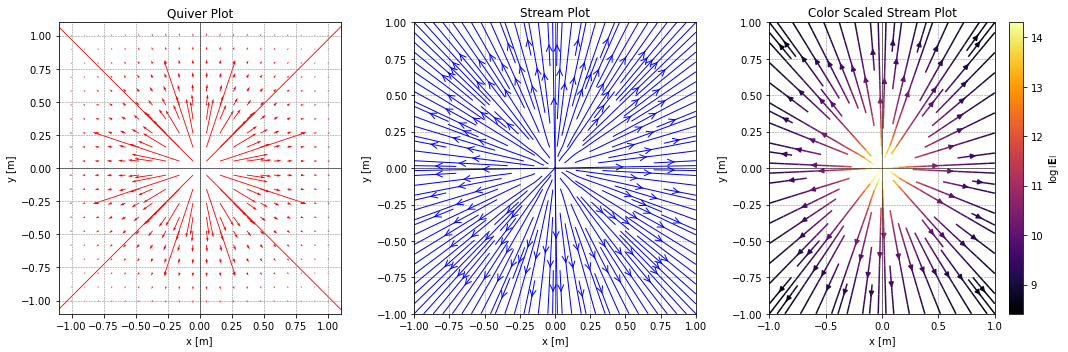

In [3]:
## Set Grid of Points
x = np.linspace(-1, 1, 20)
y = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(x, y)

## A point charge
charge = 1e-6  # C

E_x, E_y = electric_field(charge, X, Y)
plot_electric_field(X, Y, E_x, E_y)

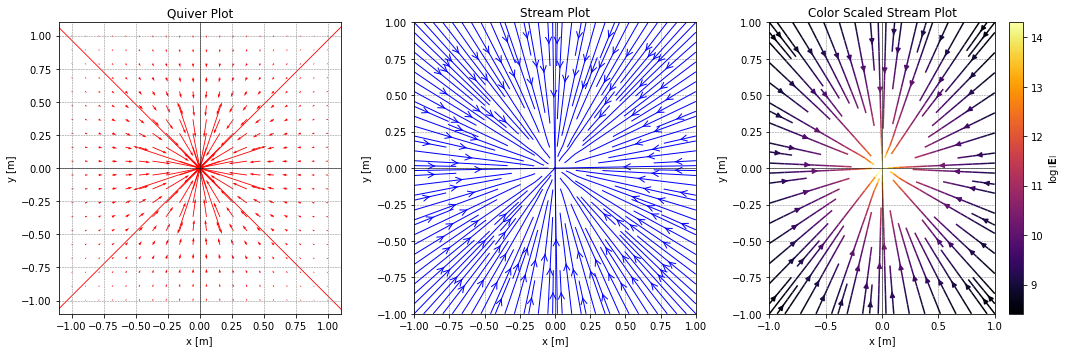

In [4]:
x = np.linspace(-1, 1, 20)
y = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(x, y)

## A negative point charge
charge = -1e-6  # C

E_x, E_y = electric_field(charge, X, Y)
plot_electric_field(X, Y, E_x, E_y)

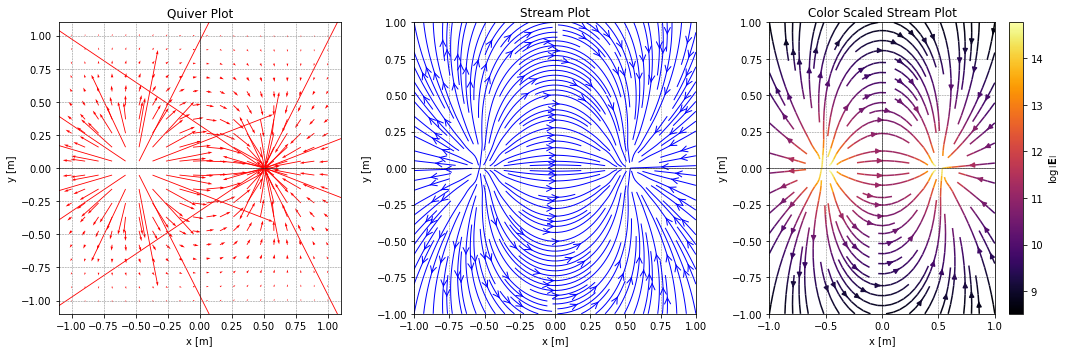

In [5]:
x = np.linspace(-1, 1, 20)
y = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(x, y)

## A positive point charge
charge1 = 1e-6  # C
x1 = -0.5  # m
y1 = 0  # m

## A negative point charge
charge2 = -1e-6  # C
x2 = 0.5  # m
y2 = 0  # m

E_1_x, E_1_y = electric_field(charge1, X, Y, x1, y1)
E_2_x, E_2_y = electric_field(charge2, X, Y, x2, y2)


## Find the net electric field in each direction
E_T_x = E_1_x + E_2_x
E_T_y = E_1_y + E_2_y

plot_electric_field(X, Y, E_T_x, E_T_y)

In [6]:
class Charge:
    def __init__(self, q, x, y):
        self.q = q  # charge value
        self.x = x  # x-coordinate
        self.y = y  # y-coordinate

# Creating instances of Charge class
charge1 = Charge(1e-6, -1, 1)  # e.g. Charge of 1 μC at (0, 0)
charge2 = Charge(-1e-6, 1, 1)  # e.g. Charge of -1 μC at (1, 0)
charge3 = Charge(1e-6, 1, -1)  # e.g. Charge of 1 μC at (0, 1)
charge4 = Charge(-1e-6, -1, -1)  # e.g. Charge of -1 μC at (1, 1)

# Storing instances in a list
charges = [charge1, charge2, charge3, charge4]

# Iterating over the list of charges
for charge in charges:
    print(f"Charge: {charge.q} C, Location: ({charge.x}, {charge.y})")

Charge: 1e-06 C, Location: (-1, 1)
Charge: -1e-06 C, Location: (1, 1)
Charge: 1e-06 C, Location: (1, -1)
Charge: -1e-06 C, Location: (-1, -1)


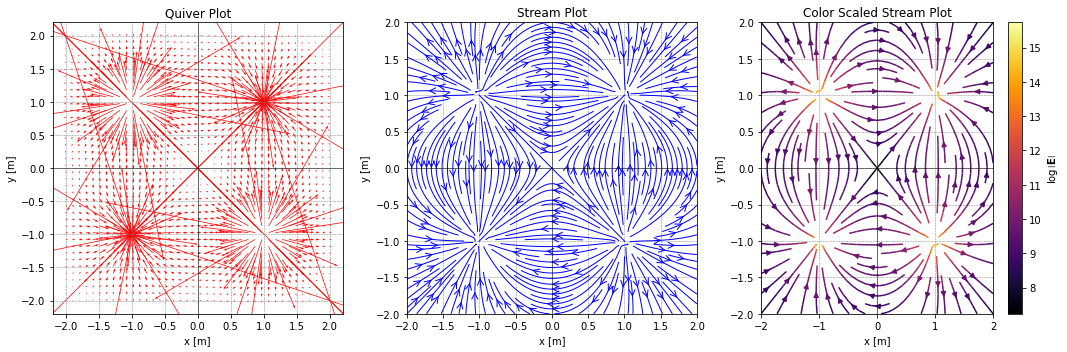

In [7]:
## Set up the space again
x = np.linspace(-2, 2, 40)
y = np.linspace(-2, 2, 40)
X, Y = np.meshgrid(x, y)

## Set the total electric field to zero
E_T_x = np.zeros_like(X)
E_T_y = np.zeros_like(Y)

## Calculate the electric field due to each charge
for charge in charges:
    E_x, E_y = electric_field(charge.q, X, Y, charge.x, charge.y)
    E_T_x += E_x
    E_T_y += E_y

plot_electric_field(X, Y, E_T_x, E_T_y)

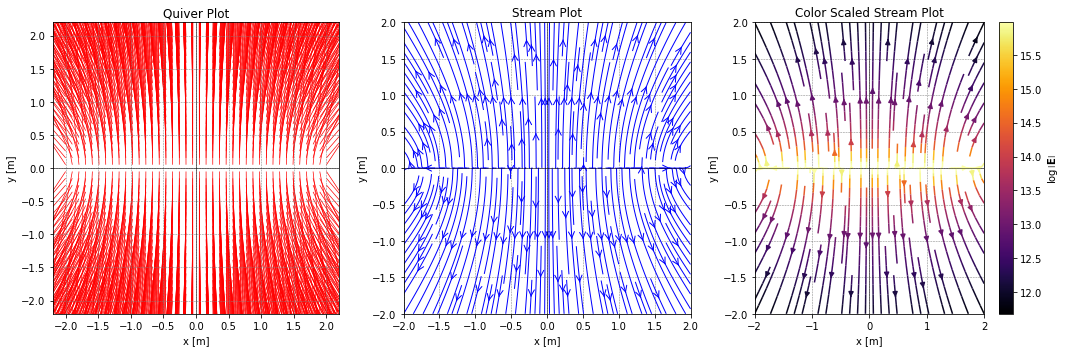

In [8]:
## Set up the space again
size = 2
step = 40

x = np.linspace(-size, size, step)
y = np.linspace(-size, size, step)
X, Y = np.meshgrid(x, y)

N = 100  # Number of charges
charges = []
for i in range(N):
    q = 1e-6  # Charge Value
    x = i*(2*size)/(N-1) - size  # Spread the charges out
    y = 0  # everything on the x-axis
    charges.append(Charge(q, x, y))  # Add the charge to the list of charges

## Set the total electric field to zero
E_T_x = np.zeros_like(X)
E_T_y = np.zeros_like(Y)

## Calculate the electric field due to each charge
for charge in charges:
    E_x, E_y = electric_field(charge.q, X, Y, charge.x, charge.y)
    E_T_x += E_x
    E_T_y += E_y

plot_electric_field(X, Y, E_T_x, E_T_y)

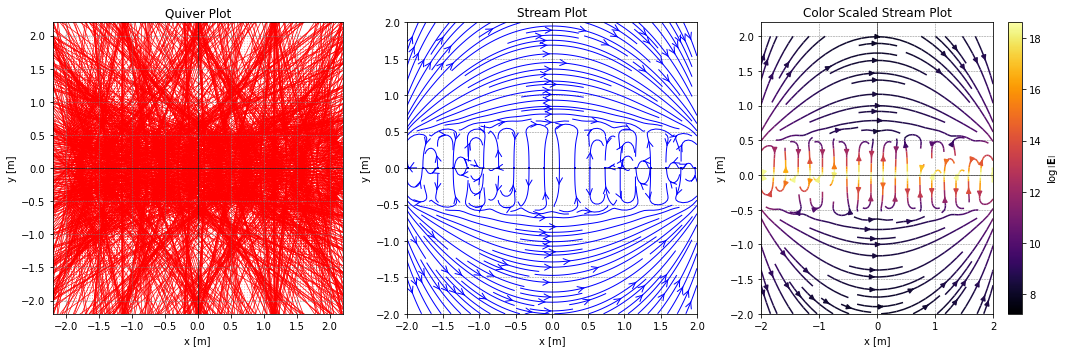

In [9]:
## Set up the space again
size = 2
step = 100

x = np.linspace(-size, size, step)
y = np.linspace(-size, size, step)
X, Y = np.meshgrid(x, y)

N = 600  # Number of charges
charges = []
for i in range(N):
    x = i*(2*size)/(N-1) - size  # Spread the charges out
    y = 0  # everything on the x-axis
    
    q = 1e-6*np.sin(30*x/(size))  # Charge Value
    
    charges.append(Charge(q, x, y))  # Add the charge to the list of charges

## Set the total electric field to zero
E_T_x = np.zeros_like(X)
E_T_y = np.zeros_like(Y)

## Calculate the electric field due to each charge
for charge in charges:
    E_x, E_y = electric_field(charge.q, X, Y, charge.x, charge.y)
    E_T_x += E_x
    E_T_y += E_y

plot_electric_field(X, Y, E_T_x, E_T_y)

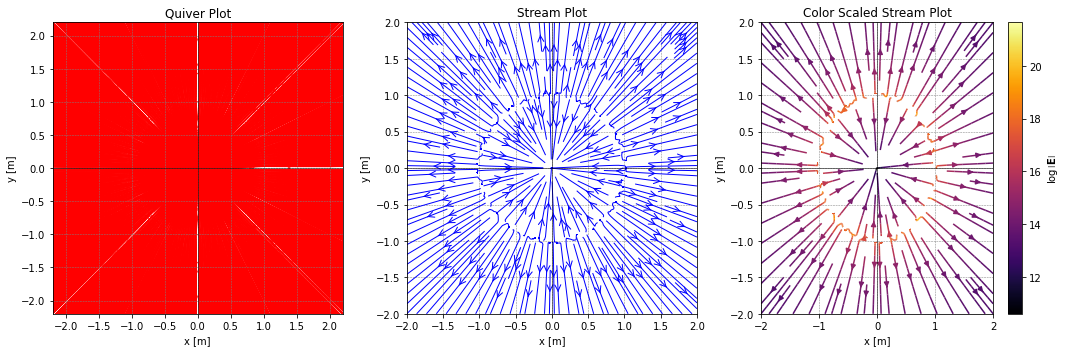

In [10]:
## Set up the space again
size = 2
step = 100
R = size/2

x = np.linspace(-size, size, step)
y = np.linspace(-size, size, step)
X, Y = np.meshgrid(x, y)

N = 360  # Number of charges
charges = []
for i in range(N):
    
    theta = i*(2*np.pi)/(N-1)  # Spread the charges out
    x = R*np.cos(theta)
    y = R*np.sin(theta)
    
    q = 1e-6  # Charge Value
    
    charges.append(Charge(q, x, y))  # Add the charge to the list of charges

## Set the total electric field to zero
E_T_x = np.zeros_like(X)
E_T_y = np.zeros_like(Y)

## Calculate the electric field due to each charge
for charge in charges:
    E_x, E_y = electric_field(charge.q, X, Y, charge.x, charge.y)
    E_T_x += E_x
    E_T_y += E_y

plot_electric_field(X, Y, E_T_x, E_T_y)
    

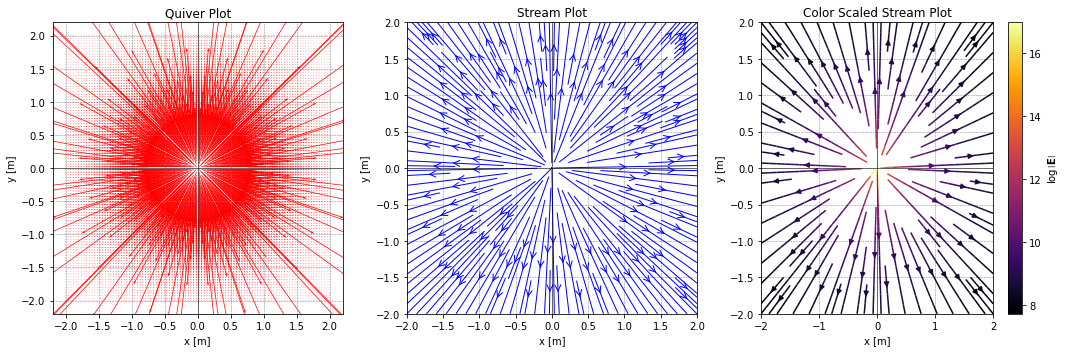

Charge: 1e-06 C, Location: (-0.0010473854330117715, 0.001778239409138533)
Charge: -1e-06 C, Location: (0.0016079367517084732, -0.00131159029135606)
Charge: 1e-06 C, Location: (0.0016750128201289427, -0.001180915680224111)
Charge: 1e-06 C, Location: (0.0009889555864839592, -0.00024759203093307884)
Charge: -1e-06 C, Location: (-0.001759689296978051, -0.0012281956764413865)
Charge: 1e-06 C, Location: (-0.0013367291674833864, -0.0001725748487303011)
Total Charge: 2e-06 C


In [11]:
## Set up the space again
size = 2
step = 100
R = size/2
scale = 1e-3 #smaller scale means charges are closer to the origin

x = np.linspace(-size, size, step)
y = np.linspace(-size, size, step)
X, Y = np.meshgrid(x, y)

N = 6 # If even there's a chance of a net charge of zero
charges = []
for i in range(N):
    
    ## Random charge value
    q = np.random.choice([-1e-6, 1e-6]) # Either a positive or negative charge
    ## Random x,y locations that are located close to the origin
    x = np.random.uniform(-scale*size, scale*size)
    y = np.random.uniform(-scale*size, scale*size)
    
    charges.append(Charge(q, x, y))  # Add the charge to the list of charges

## Set the total electric field to zero
E_T_x = np.zeros_like(X)
E_T_y = np.zeros_like(Y)

## Calculate the electric field due to each charge
for charge in charges:
    E_x, E_y = electric_field(charge.q, X, Y, charge.x, charge.y)
    E_T_x += E_x
    E_T_y += E_y

plot_electric_field(X, Y, E_T_x, E_T_y)

total_charge = 0

for charge in charges:
    print(f"Charge: {charge.q} C, Location: ({charge.x}, {charge.y})")
    total_charge += charge.q
    
print(f"Total Charge: {total_charge} C")

In [12]:
## Your code here